<a href="https://colab.research.google.com/github/arjunloomba1311/Deep-Learning-Approaches-to-Financial-Markets-/blob/main/Stock_Market_RNNs_and_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

from pandas_datareader import data, wb

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
# couldnt use the best data service for financial data, quandl, since it doesn't give all EOD stock price data
# for free

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install alpha-vantage

     |████████████████████████████████| 1.2MB 10.1MB/s 
     |████████████████████████████████| 153kB 29.3MB/s 
     |████████████████████████████████| 266kB 38.9MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25706 sha256=1839fb3ac8828c34ef1bb7b57d66bd9ed7f695865223e9d1b01345b1103537e5
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3161 sha256=f95f2ba54330d317ce83bc8cfe2fbbee62ae1c3b5a62cebf761b38e1a6057e0a
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


In [ ]:
"""
ALPHA VANTAGE API KEY 
EQYSLCK8G742XJDN
"""
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
ts = TimeSeries(key='EQYSLCK8G742XJDN', output_format='pandas')

In [ ]:
PFE, meta_data = ts.get_daily(symbol='PFE',outputsize='full')
BMY,meta_data =  ts.get_daily(symbol='BMY',outputsize='full')
ABT,meta_data =  ts.get_daily(symbol='ABT',outputsize='full')
JNJ,meta_data =  ts.get_daily(symbol = 'JNJ',outputsize = 'full')
BIIB,meta_data =  ts.get_daily(symbol = 'BIIB',outputsize = 'full')
#convert to full

In [ ]:
tickers = ['PFE','BMY','ABT','JNJ','BIIB']

In [ ]:
stocks = pd.concat([PFE,BMY ,ABT,JNJ,BIIB],axis = 1,keys = tickers)

In [ ]:
stocks.columns.names = ['Pharma Ticker','Stock Info']


In [ ]:
stock_df = pd.DataFrame()
for tick in tickers:
    stock_df[tick] = stocks[tick]['4. close']
stock_df.head()

,PFE,BMY,ABT,JNJ,BIIB
date,,,,,
2020-09-04,36.36,59.95,104.16,148.59,276.00
2020-09-03,36.40,60.05,105.53,149.55,276.15
2020-09-02,37.20,61.60,109.44,153.83,285.60
2020-09-01,36.88,60.97,106.55,151.52,279.75
2020-08-31,37.79,62.20,109.47,153.41,287.64


Text(0, 0.5, 'Stock Price/USD')

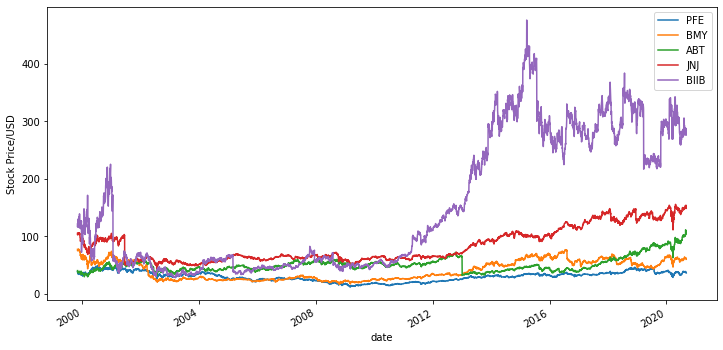

In [ ]:
stock_df.plot(figsize = (12,6))
plt.legend()
plt.ylabel('Stock Price/USD')

In [ ]:
stock_df = stock_df[::-1]

Text(0, 0.5, 'Stock Price/USD')

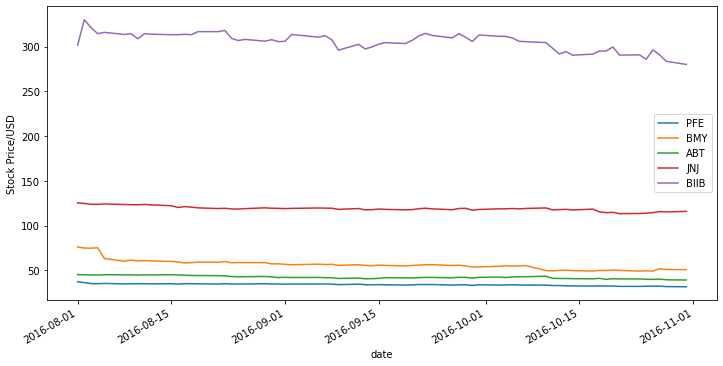

In [ ]:
stock_df.loc['2016-08-01':'2016-10-31'].plot(figsize = (12,6))
plt.legend() 
plt.ylabel('Stock Price/USD')
#stagnant prices - helpful for normalization 

In [ ]:
stock_df

,PFE,BMY,ABT,JNJ,BIIB
date,,,,,
1999-11-01,38.50,77.25,40.31,105.10,121.50
1999-11-02,38.12,74.75,38.00,102.50,116.06
1999-11-03,38.56,76.13,36.81,104.30,119.37
1999-11-04,37.25,76.25,37.88,105.30,125.62
1999-11-05,34.75,76.13,38.44,105.50,126.63
...,...,...,...,...,...
2020-08-31,37.79,62.20,109.47,153.41,287.64
2020-09-01,36.88,60.97,106.55,151.52,279.75
2020-09-02,37.20,61.60,109.44,153.83,285.60


In [ ]:
initial_dict = {}
for i in range(len(stock_df.loc['2016-08-01':'2016-10-31'].mean().values)): 
    initial_dict[stock_df.columns[i]] = stock_df.loc['2016-10-31'].values[i]
    
print(initial_dict)
#getting the previous prices

initial_dict_2 = {}
initial_dict_3 = {}
for i in range(len(stock_df.loc['2016-08-01':'2016-10-31'].mean().values)): 
    initial_dict_2[stock_df.columns[i]] = stock_df.loc['2016-08-01'].values[i]
    initial_dict_3[stock_df.columns[i]] = stock_df.loc['2016-08-02'].values[i]

print(initial_dict_2)
print('\n')
print(initial_dict_3)

{'PFE': 31.71, 'BMY': 50.91, 'ABT': 39.24, 'JNJ': 115.99, 'BIIB': 280.18}
{'PFE': 37.31, 'BMY': 76.19, 'ABT': 45.29, 'JNJ': 125.4, 'BIIB': 301.83}


{'PFE': 36.39, 'BMY': 75.05, 'ABT': 45.07, 'JNJ': 124.85, 'BIIB': 330.11}


In [ ]:
stock_df.loc['2016-08-01':'2016-10-31'] = 100

Text(0, 0.5, 'Stock Price/USD')

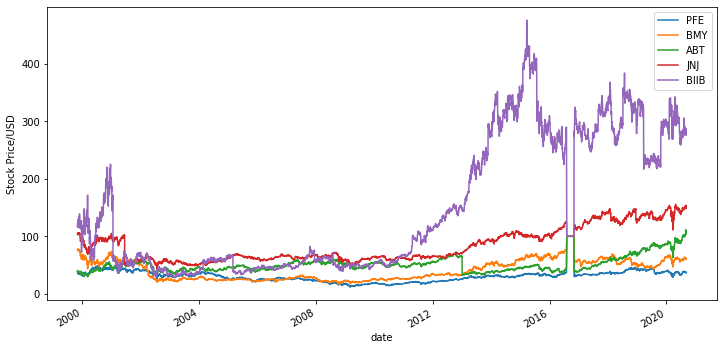

In [ ]:
stock_df.plot(figsize = (12,6))
plt.legend()
plt.ylabel('Stock Price/USD')

In [ ]:
stock_df.loc['2016-10-31'] = initial_dict
# stock_df = stock_df.drop('2016-10-31',axis = 1)
print(stock_df.loc['2016-10-31'])
print('\n')
print(stock_df.loc['2016-11-01'])

stock_df.loc['2016-08-01'] = initial_dict_2
stock_df.loc['2016-08-02'] = initial_dict_3
# stock_df = stock_df.drop('2016-10-31',axis = 1)
print(stock_df.loc['2016-08-01'])
print('\n')
print(stock_df.loc['2016-08-02'])

PFE      31.71
BMY      50.91
ABT      39.24
JNJ     115.99
BIIB    280.18
Name: 2016-10-31 00:00:00, dtype: float64


PFE      31.07
BMY      50.80
ABT      39.05
JNJ     115.34
BIIB    282.56
Name: 2016-11-01 00:00:00, dtype: float64
PFE      37.31
BMY      76.19
ABT      45.29
JNJ     125.40
BIIB    301.83
Name: 2016-08-01 00:00:00, dtype: float64


PFE      36.39
BMY      75.05
ABT      45.07
JNJ     124.85
BIIB    330.11
Name: 2016-08-02 00:00:00, dtype: float64


In [ ]:
per_change_df = stock_df.pct_change()
print('change in constant part')
print(per_change_df.loc['2016-08-01':'2016-11-1'].head())
print('\n')

req_per = per_change_df.loc['2016-10-31':]
print('required changes for latter part')
print(len(req_per))
req_per
print('\n')

req_per_2 = per_change_df.loc[:'2016-08-01']
print('required changes for former part')
print(len(req_per_2))
req_per_2

print('\n')

new_stock_df = stock_df.loc['2016-10-31':]
new_stock_df.loc['2016-10-31'] = 100
print('length of df1')
print(len(new_stock_df))

new_stock_df_2 = stock_df.loc[:'2016-08-01']
new_stock_df_2.loc['2016-08-01'] = 100
print('length of df 2')

stock_df.loc['2016-08-02'] = 100

change in constant part
                 PFE       BMY       ABT       JNJ      BIIB
date                                                        
2016-08-01  0.011385  0.018447  0.012067  0.001358  0.041044
2016-08-02 -0.024658 -0.014963 -0.004858 -0.004386  0.093695
2016-08-03  1.748008  0.332445  1.218771 -0.199039 -0.697071
2016-08-04  0.000000  0.000000  0.000000  0.000000  0.000000
2016-08-05  0.000000  0.000000  0.000000  0.000000  0.000000


required changes for latter part
969


required changes for former part
4214


length of df1
969
length of df 2


In [ ]:
print(req_per.head())
print('\n')
print(req_per_2.tail())

                 PFE       BMY       ABT       JNJ      BIIB
date                                                        
2016-10-31 -0.682900 -0.490900 -0.607600  0.159900  1.801800
2016-11-01 -0.020183 -0.002161 -0.004842 -0.005604  0.008495
2016-11-02 -0.014162 -0.004528 -0.008963 -0.004162 -0.018757
2016-11-03 -0.024159 -0.007119 -0.008269  0.001480 -0.013597
2016-11-04  0.003680  0.015933  0.018499  0.000695  0.012834


                 PFE       BMY       ABT       JNJ      BIIB
date                                                        
2016-07-26  0.001359 -0.006617  0.004377  0.002082 -0.001079
2016-07-27  0.000543  0.018785  0.001606 -0.003036  0.004564
2016-07-28 -0.004885 -0.023669  0.017861 -0.002485  0.002358
2016-07-29  0.005999  0.002009  0.006749  0.006187  0.003114
2016-08-01  0.011385  0.018447  0.012067  0.001358  0.041044


In [ ]:
for i in range(len(new_stock_df) - 1): 
    new_stock_df['PFE'].iloc[i+1] = (new_stock_df['PFE'].iloc[i] * req_per['PFE'][i+1]) + new_stock_df['PFE'].iloc[i]
    new_stock_df['BMY'].iloc[i+1] = (new_stock_df['BMY'].iloc[i] * req_per['BMY'][i+1]) + new_stock_df['BMY'].iloc[i]
    new_stock_df['ABT'].iloc[i+1] = (new_stock_df['ABT'].iloc[i] * req_per['ABT'][i+1]) + new_stock_df['ABT'].iloc[i]
    new_stock_df['JNJ'].iloc[i+1] = (new_stock_df['JNJ'].iloc[i] * req_per['JNJ'][i+1]) + new_stock_df['JNJ'].iloc[i]
    new_stock_df['BIIB'].iloc[i+1] = (new_stock_df['BIIB'].iloc[i] * req_per['BIIB'][i+1]) + new_stock_df['BIIB'].iloc[i]

In [ ]:
for i in range(len(new_stock_df_2)-1,0,-1):
    new_stock_df_2['PFE'].iloc[i-1] = (new_stock_df_2['PFE'].iloc[i]/(req_per_2['PFE'][i] + 1))
    new_stock_df_2['BMY'].iloc[i-1] = (new_stock_df_2['BMY'].iloc[i]/(req_per_2['BMY'][i] + 1))
    new_stock_df_2['ABT'].iloc[i-1] = (new_stock_df_2['ABT'].iloc[i]/(req_per_2['ABT'][i] + 1))
    new_stock_df_2['JNJ'].iloc[i-1] = (new_stock_df_2['JNJ'].iloc[i]/(req_per_2['JNJ'][i] + 1))
    new_stock_df_2['BIIB'].iloc[i-1] = (new_stock_df_2['BIIB'].iloc[i]/(req_per_2['BIIB'][i] + 1))

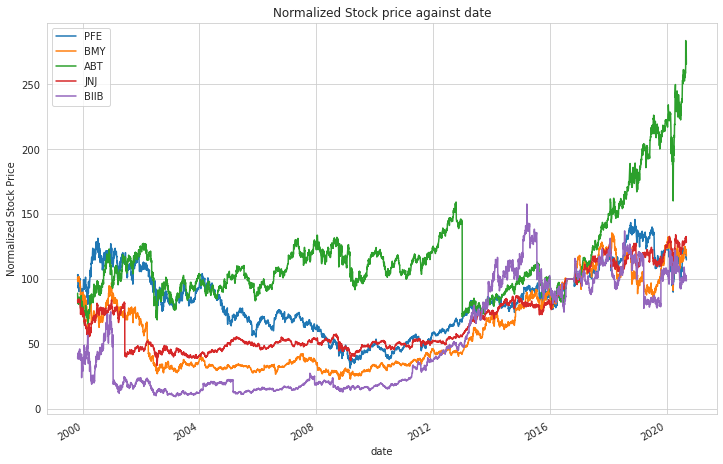

In [ ]:
sns.set_style('whitegrid')

stock_df.plot(figsize = (12,8))
plt.ylabel('Normalized Stock Price')
plt.title('Normalized Stock price against date')
plt.legend()

In [ ]:
stock_df = stock_df.iloc[1:]
stock_df.head()

,PFE,BMY,ABT,JNJ,BIIB
date,,,,,
1999-11-02,102.171000,98.109988,83.903732,81.738437,38.452109
1999-11-03,103.350308,99.921250,81.276220,83.173844,39.548753
1999-11-04,99.839185,100.078750,83.638772,83.971292,41.619455
1999-11-05,93.138569,99.921250,84.875248,84.130781,41.954080
1999-11-08,93.138569,100.984381,85.846765,83.253589,43.070603


In [ ]:
stock_df
#stock market is closed on weekends you dummy

,PFE,BMY,ABT,JNJ,BIIB
date,,,,,
1999-11-02,102.171000,98.109988,83.903732,81.738437,38.452109
1999-11-03,103.350308,99.921250,81.276220,83.173844,39.548753
1999-11-04,99.839185,100.078750,83.638772,83.971292,41.619455
1999-11-05,93.138569,99.921250,84.875248,84.130781,41.954080
1999-11-08,93.138569,100.984381,85.846765,83.253589,43.070603
...,...,...,...,...,...
2020-08-31,119.173762,122.176390,278.975535,132.261402,102.662574
2020-09-01,116.304005,119.760361,271.534149,130.631951,99.846527
2020-09-02,117.313150,120.997839,278.899083,132.623502,101.934471


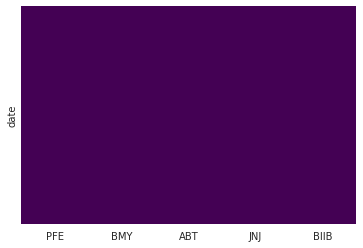

In [ ]:
sns.heatmap(stock_df.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [ ]:
def labeling(df): 
    per_change = (df.pct_change() * 100) 
    for i in df.columns: 
        df[i + ' fall'] = per_change[i].apply(lambda x: 1 if x<-2 else 0)
    return df

In [ ]:
df = pd.DataFrame()
for tick in tickers:
    df[tick] = stocks[tick]['4. close']
df.head()

df = df[::-1]

In [ ]:
cols = [i for i in range(1000)]
arr = np.zeros((len(df),500))

for i in range(500,len(df)):
    count = 500
    for j in range(500):
        arr[i][j] = df['PFE'].iloc[i - count]
        count -= 1
        if count < 0: 
               break

In [ ]:
new_df = pd.DataFrame(arr,index = df.index).iloc[500:]

In [ ]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-10-30,38.50,38.12,38.56,37.25,34.75,34.75,35.00,35.00,35.38,35.13,35.00,33.88,33.81,33.69,33.75,35.00,35.69,36.38,36.00,37.44,36.25,35.90,36.01,35.75,35.06,33.81,34.00,33.75,33.88,33.13,33.38,34.25,34.00,33.25,32.91,32.63,33.75,34.13,34.50,33.63,...,40.15,39.60,38.30,38.31,38.59,39.34,38.45,37.00,38.17,38.14,37.80,37.02,36.54,35.80,36.03,36.98,38.55,39.75,40.10,41.10,41.50,41.25,41.02,41.79,41.00,40.74,41.75,40.26,40.86,41.37,41.10,41.65,41.86,42.33,43.00,42.65,42.96,43.01,42.70,42.57
2001-10-31,38.12,38.56,37.25,34.75,34.75,35.00,35.00,35.38,35.13,35.00,33.88,33.81,33.69,33.75,35.00,35.69,36.38,36.00,37.44,36.25,35.90,36.01,35.75,35.06,33.81,34.00,33.75,33.88,33.13,33.38,34.25,34.00,33.25,32.91,32.63,33.75,34.13,34.50,33.63,32.88,...,39.60,38.30,38.31,38.59,39.34,38.45,37.00,38.17,38.14,37.80,37.02,36.54,35.80,36.03,36.98,38.55,39.75,40.10,41.10,41.50,41.25,41.02,41.79,41.00,40.74,41.75,40.26,40.86,41.37,41.10,41.65,41.86,42.33,43.00,42.65,42.96,43.01,42.70,42.57,42.45
2001-11-01,38.56,37.25,34.75,34.75,35.00,35.00,35.38,35.13,35.00,33.88,33.81,33.69,33.75,35.00,35.69,36.38,36.00,37.44,36.25,35.90,36.01,35.75,35.06,33.81,34.00,33.75,33.88,33.13,33.38,34.25,34.00,33.25,32.91,32.63,33.75,34.13,34.50,33.63,32.88,32.69,...,38.30,38.31,38.59,39.34,38.45,37.00,38.17,38.14,37.80,37.02,36.54,35.80,36.03,36.98,38.55,39.75,40.10,41.10,41.50,41.25,41.02,41.79,41.00,40.74,41.75,40.26,40.86,41.37,41.10,41.65,41.86,42.33,43.00,42.65,42.96,43.01,42.70,42.57,42.45,41.90
2001-11-02,37.25,34.75,34.75,35.00,35.00,35.38,35.13,35.00,33.88,33.81,33.69,33.75,35.00,35.69,36.38,36.00,37.44,36.25,35.90,36.01,35.75,35.06,33.81,34.00,33.75,33.88,33.13,33.38,34.25,34.00,33.25,32.91,32.63,33.75,34.13,34.50,33.63,32.88,32.69,32.44,...,38.31,38.59,39.34,38.45,37.00,38.17,38.14,37.80,37.02,36.54,35.80,36.03,36.98,38.55,39.75,40.10,41.10,41.50,41.25,41.02,41.79,41.00,40.74,41.75,40.26,40.86,41.37,41.10,41.65,41.86,42.33,43.00,42.65,42.96,43.01,42.70,42.57,42.45,41.90,42.74
2001-11-05,34.75,34.75,35.00,35.00,35.38,35.13,35.00,33.88,33.81,33.69,33.75,35.00,35.69,36.38,36.00,37.44,36.25,35.90,36.01,35.75,35.06,33.81,34.00,33.75,33.88,33.13,33.38,34.25,34.00,33.25,32.91,32.63,33.75,34.13,34.50,33.63,32.88,32.69,32.44,31.88,...,38.59,39.34,38.45,37.00,38.17,38.14,37.80,37.02,36.54,35.80,36.03,36.98,38.55,39.75,40.10,41.10,41.50,41.25,41.02,41.79,41.00,40.74,41.75,40.26,40.86,41.37,41.10,41.65,41.86,42.33,43.00,42.65,42.96,43.01,42.70,42.57,42.45,41.90,42.74,42.20


In [ ]:
def weekly_labelling(df): 
    per_change = (df.pct_change(periods = 7) * 100) 
    for i in df.columns: 
        df[i + ' week_fall'] = per_change[i].apply(lambda x: 1 if x<-2 else 0)
    return df

In [ ]:
weekly_labelling(df)

,PFE,BMY,ABT,JNJ,BIIB,PFE week_fall,BMY week_fall,ABT week_fall,JNJ week_fall,BIIB week_fall,PFE week_fall week_fall,BMY week_fall week_fall,ABT week_fall week_fall,JNJ week_fall week_fall,BIIB week_fall week_fall
date,,,,,,,,,,,,,,,
1999-11-01,38.50,77.25,40.31,105.10,121.50,0,0,0,0,0,0,0,0,0,0
1999-11-02,38.12,74.75,38.00,102.50,116.06,0,0,0,0,0,0,0,0,0,0
1999-11-03,38.56,76.13,36.81,104.30,119.37,0,0,0,0,0,0,0,0,0,0
1999-11-04,37.25,76.25,37.88,105.30,125.62,0,0,0,0,0,0,0,0,0,0
1999-11-05,34.75,76.13,38.44,105.50,126.63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,37.79,62.20,109.47,153.41,287.64,1,0,0,0,0,0,0,0,0,1
2020-09-01,36.88,60.97,106.55,151.52,279.75,1,0,0,0,0,0,1,0,0,1
2020-09-02,37.20,61.60,109.44,153.83,285.60,1,0,0,0,0,0,0,0,0,1


In [ ]:
new_df1 = df[['PFE','PFE week_fall']].iloc[500:]

In [ ]:
final_df = pd.concat([new_df,new_df1],axis = 1,join = 'outer')

In [ ]:
final_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,PFE,PFE week_fall
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-31,41.85,41.78,42.20,42.06,42.31,42.41,42.85,42.96,43.01,43.51,43.26,43.75,44.06,43.93,43.79,43.68,43.90,44.07,44.27,44.22,44.81,44.70,44.91,45.28,45.47,44.51,42.81,43.78,43.12,43.93,44.57,44.00,44.50,44.37,44.10,42.48,43.41,42.60,43.23,42.89,...,33.75,33.46,33.83,35.21,35.23,35.72,35.60,36.25,36.50,36.69,38.56,38.41,37.66,37.54,39.02,39.26,38.74,38.48,38.35,38.39,38.45,38.27,38.45,38.39,37.79,38.33,38.17,38.06,38.35,38.36,38.26,38.72,38.88,38.84,38.41,38.05,37.86,37.91,37.79,1
2020-09-01,41.78,42.20,42.06,42.31,42.41,42.85,42.96,43.01,43.51,43.26,43.75,44.06,43.93,43.79,43.68,43.90,44.07,44.27,44.22,44.81,44.70,44.91,45.28,45.47,44.51,42.81,43.78,43.12,43.93,44.57,44.00,44.50,44.37,44.10,42.48,43.41,42.60,43.23,42.89,43.06,...,33.46,33.83,35.21,35.23,35.72,35.60,36.25,36.50,36.69,38.56,38.41,37.66,37.54,39.02,39.26,38.74,38.48,38.35,38.39,38.45,38.27,38.45,38.39,37.79,38.33,38.17,38.06,38.35,38.36,38.26,38.72,38.88,38.84,38.41,38.05,37.86,37.91,37.79,36.88,1
2020-09-02,42.20,42.06,42.31,42.41,42.85,42.96,43.01,43.51,43.26,43.75,44.06,43.93,43.79,43.68,43.90,44.07,44.27,44.22,44.81,44.70,44.91,45.28,45.47,44.51,42.81,43.78,43.12,43.93,44.57,44.00,44.50,44.37,44.10,42.48,43.41,42.60,43.23,42.89,43.06,43.67,...,33.83,35.21,35.23,35.72,35.60,36.25,36.50,36.69,38.56,38.41,37.66,37.54,39.02,39.26,38.74,38.48,38.35,38.39,38.45,38.27,38.45,38.39,37.79,38.33,38.17,38.06,38.35,38.36,38.26,38.72,38.88,38.84,38.41,38.05,37.86,37.91,37.79,36.88,37.20,1
2020-09-03,42.06,42.31,42.41,42.85,42.96,43.01,43.51,43.26,43.75,44.06,43.93,43.79,43.68,43.90,44.07,44.27,44.22,44.81,44.70,44.91,45.28,45.47,44.51,42.81,43.78,43.12,43.93,44.57,44.00,44.50,44.37,44.10,42.48,43.41,42.60,43.23,42.89,43.06,43.67,42.93,...,35.21,35.23,35.72,35.60,36.25,36.50,36.69,38.56,38.41,37.66,37.54,39.02,39.26,38.74,38.48,38.35,38.39,38.45,38.27,38.45,38.39,37.79,38.33,38.17,38.06,38.35,38.36,38.26,38.72,38.88,38.84,38.41,38.05,37.86,37.91,37.79,36.88,37.20,36.40,1
2020-09-04,42.31,42.41,42.85,42.96,43.01,43.51,43.26,43.75,44.06,43.93,43.79,43.68,43.90,44.07,44.27,44.22,44.81,44.70,44.91,45.28,45.47,44.51,42.81,43.78,43.12,43.93,44.57,44.00,44.50,44.37,44.10,42.48,43.41,42.60,43.23,42.89,43.06,43.67,42.93,43.52,...,35.23,35.72,35.60,36.25,36.50,36.69,38.56,38.41,37.66,37.54,39.02,39.26,38.74,38.48,38.35,38.39,38.45,38.27,38.45,38.39,37.79,38.33,38.17,38.06,38.35,38.36,38.26,38.72,38.88,38.84,38.41,38.05,37.86,37.91,37.79,36.88,37.20,36.40,36.36,1


In [ ]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
reg_df = final_df.drop('PFE week_fall',axis = 1)

In [ ]:
T = 500
D = 1 
M = 5 

In [ ]:
x = reg_df.drop('PFE',axis = 1)
y = reg_df['PFE']

In [ ]:
X = np.array(x).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (4746, 500, 1) Y.shape (4746,)


In [ ]:
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)

In [ ]:
r = model.fit(
  X[:3504], Y[:3504],
  epochs= 30, 
  validation_data=(X[3504:], Y[3504:]),
)

Epoch 1/100
110/110 [==============================] - 2s 19ms/step - loss: 170.2892 - val_loss: 115.0658
Epoch 2/100
110/110 [==============================] - 2s 16ms/step - loss: 44.9609 - val_loss: 116.2779
Epoch 3/100
110/110 [==============================] - 2s 16ms/step - loss: 44.9266 - val_loss: 119.4471
Epoch 4/100
110/110 [==============================] - 2s 16ms/step - loss: 44.9594 - val_loss: 122.4061
Epoch 5/100
110/110 [==============================] - 2s 16ms/step - loss: 44.9745 - val_loss: 120.0498
Epoch 6/100
110/110 [==============================] - 2s 16ms/step - loss: 44.9431 - val_loss: 124.5661
Epoch 7/100
110/110 [==============================] - 2s 16ms/step - loss: 44.9415 - val_loss: 127.0370
Epoch 8/100
110/110 [==============================] - 2s 16ms/step - loss: 44.9491 - val_loss: 118.9426
Epoch 9/100
110/110 [==============================] - 2s 16ms/step - loss: 45.0170 - val_loss: 115.6149
Epoch 10/100
110/110 [==============================] 

In [ ]:
#TODO - add loss function code 

(4746, 1)


Text(0.5, 1.0, 'Pfizer ')

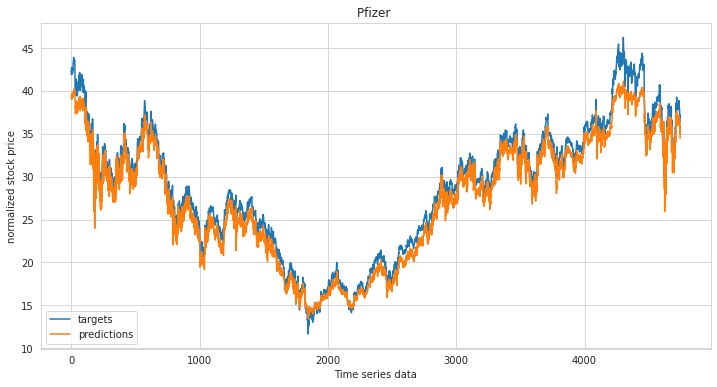

In [ ]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.figure(figsize = (12,6))

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()

plt.xlabel("Time series data")
plt.ylabel("normalized stock price")
plt.title("Pfizer ")

In [ ]:
y_target = Y[3504:]
y_predictions = []
y_fall = []

# index of first test input
i = 3504

while len(y_predictions) < len(y_target):
  fall = 0
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  t = p #predicted price 
  t_dash = X[i-7].reshape(1, -1, 1)[0,0] #price one week ago 
  if (((t-t_dash)/t_dash) * 100 < -2): 
    fall = 1
  i += 1
  
  y_fall.append(fall)
  y_predictions.append(p)

In [ ]:
y_test = final_df['PFE week_fall'].iloc[3504:].values

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(1, ' layer and 50 nodes in each layer')
print(classification_report(y_test,y_fall))
print('\n')
print(confusion_matrix(y_test, y_fall))

1  layer and 50 nodes in each layer
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1376
           1       0.38      0.62      0.47       359

    accuracy                           0.71      1735
   macro avg       0.63      0.67      0.63      1735
weighted avg       0.78      0.71      0.73      1735



[[1010  366]
 [ 138  221]]


In [ ]:
len(X[3504].reshape(1,-1,1)[0])
#500 elements in this arrray 

In [ ]:
from sklearn.metrics import mean_absolute_error, balanced_accuracy_score

In [ ]:
print(balanced_accuracy_score(y_fall, y_test))

In [ ]:
y_predictions = np.array(y_predictions)
print("mean absolute error is " , mean_absolute_error(y_target, y_predictions))
print("mean squared error is ", np.sqrt(mean_absolute_error(y_target, y_predictions)))

Code for predicting the price in the next year below with just one input dataset






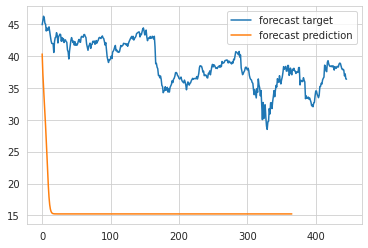

In [ ]:
# Multi-step forecast to predict the price after one year 
validation_target = Y[4300:]
validation_predictions = []

# first input - 31 dec 2015 
last_x = X[4300] # 1-D array of length T

while len(validation_predictions) < 366:
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  
  # predictions list 
  validation_predictions.append(p)
  
  # take the output and insert in new input 
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
print("predicted is $ ", validation_predictions[-1])
print("targetted is $ ", validation_target[366])

predicted is $  15.238487
targetted is $  42.48


In [ ]:
# Multi-step forecast 
y_target = Y[3504:]
y_predictions = []
y_fall = []

# first validation input
last_x = X[3000] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
    t = p #predicted price 
  t_dash = X[i-7].reshape(1, -1, 1)[0,0] #price one week ago 
  if (((t-t_dash)/t_dash) * 100 < -2): 
    fall = 1
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [ ]:
# plt.plot(validation_target, label='forecast target')
# plt.plot(validation_predictions, label='forecast prediction')
# plt.legend()

In [ ]:
# validation_predictions = np.array(validation_predictions)
# print("mean absolute error is " , mean_absolute_error(validation_target, validation_predictions))
# print("mean squared error is ", np.sqrt(mean_absolute_error(validation_predictions, validation_target)))

In [ ]:
!pip install fbprophet

In [ ]:
prophet_df = final_df['PFE']

In [ ]:
prophet_df = final_df.rename(columns = {'PFE':'y','date':'ds'})

In [ ]:
prophet_df.head()

In [ ]:
prophet = stock_df.reset_index()

In [ ]:
prophet = prophet[['date', 'PFE']]

In [ ]:
prophet.columns = ['ds','y']

In [ ]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(prophet) 

In [ ]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Pfizer stock price using Facebook Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [ ]:
# acc = round(accuracy_score(y_fall, y_test) * 100,1)
# accuracy_10[num_layers] = acc

In [ ]:
new_df = final_df.reset_index()
new_df[new_df['date'] == '2015-12-31'].index

Int64Index([4060], dtype='int64')

In [ ]:
new_df[new_df['date'] == '2017-01-03'].index

Int64Index([4313], dtype='int64')